# RNN을 사용한 문장 생성
## 언어 모델을 사용한 문장 생성
문장 생성 구현

In [1]:
import numpy as np
from common.functions import softmax
import nbimporter
from ch06 import BetterRnnlm
from ch06 import Rnnlm

In [2]:
class RnnlmGen(Rnnlm):
    def generate(self, start_id, skip_ids=None, sample_size=100):
        word_ids = [start_id]

        x = start_id
        while len(word_ids) < sample_size:
            x = np.array(x).reshape(1, 1)
            score = self.predict(x)
            p = softmax(score.flatten())

            sampled = np.random.choice(len(p), size=1, p=p)
            if (skip_ids is None) or (sampled not in skip_ids):
                x = sampled
                word_ids.append(int(x))
            
        return word_ids

In [3]:
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

## 가중치 없는 경우
model = RnnlmGen()

start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you frustrating kennedy asserted scottish measurements involve training eurodollars skinner highways novels ethnic fears reed hinted edgar unveiled honesty diplomats occur sponsor selling flamboyant beer missile repaid plane wishes jacobson practicing californians prepayment pfeiffer inside agents workout proper u.s. trim class thomson marlin fundamentals restructuring own ivory comptroller pain shakespeare responsive deloitte becoming luis cornell truth develop cray-3 republicans meantime millions credentials kick incumbent craze fossil displays stand serious me laurence death nov. soil poll mass-market productive plants ual brand clifford figured yielded belli compaq compelling breaks resolved performers undersecretary lay dynamics impose hong alvin beach deposits ranks quotations shelter


In [4]:
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

## 직접 학습한 가중치 불러오기
model = RnnlmGen()
model.load_params('Rnnlm.pkl')

start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you pat personal beef fame loral yen palmer likelihood jeopardy businessland chasing indications kept explained concord annuities fans rarely stock bacteria dubbed four-year toxic searched afford adapted news straszheim guards relationship warsaw closes buy section approach reynolds leaped reception overall offsetting powerful impressed administrative minister relied external equitec founder treasury cray teachers fulfill dominion pan subscribe clearing desk grace supervision broadway sports removal gridlock pencils dominion incest columbus courter armco senate backlash officials historically alone notable revamping loud australia interests weaken detailed vickers ignorance bonus technique education mae hypothetical acknowledged derived indexing marginally fast-food northern cs exceeded newport manner roads


In [5]:
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

## 교재 가중치 불러오기
model = RnnlmGen()
model.load_params('Rnnlm_origin.pkl')

start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you banknote stevenson notably colony patterns forward hired at&t aides roth australia decliners caterpillar abuse superior deployed calendar carolina failure rome balls rules largest booming advertised underlying rebuild volunteer billed cowboys variety economics columnist copy kkr towel boy norway 19th stephen exotic draft seoul nebraska civil consensus seniority privacy diplomatic probing undo developers out battered arbitragers examined cautious households psychological frustration publishers vetoed tomorrow recover recognized rage nfl steelmaker collar oy g. adjacent haul kenneth epa blocked al acts measurements story won debenture imminent beam taylor citizen revamping circuits bosses slump balls abandoned sea unfair solicitation brouwer corners transfers debates


더 좋은 문장으로

In [6]:
class BetterRnnlmGen(BetterRnnlm):
    def generate(self, start_id, skip_ids=None, sample_size=100):
        word_ids = [start_id]

        x = start_id
        while len(word_ids) < sample_size:
            x = np.array(x).reshape(1, 1)
            score = self.predict(x).flatten()
            p = softmax(score).flatten()

            sampled = np.random.choice(len(p), size=1, p=p)
            if (skip_ids is None) or (sampled not in skip_ids):
                x = sampled
                word_ids.append(int(x))

        return word_ids

    def get_state(self):
        states = []
        for layer in self.lstm_layers:
            states.append((layer.h, layer.c))
        return states

    def set_state(self, states):
        for layer, state in zip(self.lstm_layers, states):
            layer.set_state(*state)

In [7]:
import sys
sys.path.append('..')
from common.np import *
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)


model = BetterRnnlmGen()
model.load_params('./BetterRnnlm.pkl')

# start 문자와 skip 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')

print(txt)


model.reset_state()

start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')]

for x in start_ids[:-1]:
    x = np.array(x).reshape(1, 1)
    model.predict(x)

word_ids = model.generate(start_ids[-1], skip_ids)
word_ids = start_ids[:-1] + word_ids
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print('-' * 50)
print(txt)

ValueError: could not broadcast input array from shape (9991,650) into shape (10000,640)

## seq2seq

덧셈 데이터셋

In [8]:
from dataset import sequence

(x_train, t_train), (x_test, t_test) = sequence.load_data('./addition.txt', seed=1984)
char_to_id, id_to_char = sequence.get_vocab()

print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)
print()

print(x_train[0])
print(t_train[0])
print()

print(''.join([id_to_char[c] for c in x_train[0]]))
print(''.join([id_to_char[c] for c in t_train[0]]))

(45000, 7) (45000, 5)
(5000, 7) (5000, 5)

[ 3  0  2  0  0 11  5]
[ 6  0 11  7  5]

71+118 
_189 


## seq2seq 구현
Encoder 클래스

In [9]:
from common.time_layers import *

class Encoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4*H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4*H) / np.sqrt(H)).astype('f')
        lstm_b = (rn(4*H)).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=False)

        self.params = self.embed.params + self.lstm.params
        self.grads = self.embed.grads + self.lstm.grads
        self.hs = None
    
    def forward(self, xs):
        xs = self.embed.forward(xs)
        hs = self.lstm.forward(xs)
        self.hs = hs
        return hs[:, -1, :]
    
    def backward(self, dh):
        dhs = np.zeros_like(self.hs)
        dhs[:, -1, :] = dh

        dout = self.lstm.backward(dhs)
        dout = self.embed.backward(dout)
        return dout

Decoder 클래스

In [10]:
class Decoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4*H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4*H) / np.sqrt(H)).astype('f')
        lstm_b = (rn(4*H)).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
    
    def forward(self, xs, h):
        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        out = self.lstm.forward(out)
        score = self.affine.forward(out)
        return score
    
    def backward(self, dscore):
        dout = self.affine.backward(dscore)
        dout = self.lstm.backward(dout)
        dout = self.embed.backward(dout)
        dh = self.lstm.dh
        return dh
    
    def generate(self, h, start_id, sample_size): ## decoder의 학습과 생성이 다른 이유? 학습은 probabilistic vs 생성은 deterministic
        sampled = []
        sample_id = start_id
        self.lstm.set_state(h)

        for _ in range(sample_size):
            x = np.array(sample_id).reshape((1,1))
            out = self.embed.forward(x)
            out = self.lstm.forward(out)
            score = self.affine.forward(out) 

            ## score -> (1, 1, V)
            sample_id = np.argmax(score.flatten())
            sampled.append(int(sample_id))
        
        return sampled
            

Seq2seq 클래스

In [11]:
from common.base_model import BaseModel

class Seq2seq(BaseModel):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = Decoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads
    
    def forward(self, xs, ts):
        decoder_xs, decoder_ts = ts[:, :-1], ts[:, 1:]
        h = self.encoder.forward(xs)
        score = self.decoder.forward(decoder_xs, h)
        loss = self.softmax.forward(score, decoder_ts)
        return loss
    
    def backward(self, dout=1):
        dout = self.softmax.backward(dout)
        dh = self.decoder.backward(dout)
        dout = self.encoder.backward(dh)
        return dout
    
    def generate(self, xs, start_id, sample_size):
        h = self.encoder.forward(xs)
        sampled = self.decoder.generate(h, start_id, sample_size)
        return sampled

seq2seq 평가

In [12]:
class PeekyDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(H + D, 4 * H) / np.sqrt(H + D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H + H, V) / np.sqrt(H + H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
        self.cache = None

    def forward(self, xs, h):
        N, T = xs.shape
        N, H = h.shape

        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        hs = np.repeat(h, T, axis=0).reshape(N, T, H)
        out = np.concatenate((hs, out), axis=2)

        out = self.lstm.forward(out)
        out = np.concatenate((hs, out), axis=2)

        score = self.affine.forward(out)
        self.cache = H
        return score

    def backward(self, dscore):
        H = self.cache

        dout = self.affine.backward(dscore)
        dout, dhs0 = dout[:, :, H:], dout[:, :, :H]
        dout = self.lstm.backward(dout)
        dembed, dhs1 = dout[:, :, H:], dout[:, :, :H]
        self.embed.backward(dembed)

        dhs = dhs0 + dhs1
        dh = self.lstm.dh + np.sum(dhs, axis=1)
        return dh

    def generate(self, h, start_id, sample_size):
        sampled = []
        char_id = start_id
        self.lstm.set_state(h)

        H = h.shape[1]
        peeky_h = h.reshape(1, 1, H)
        for _ in range(sample_size):
            x = np.array([char_id]).reshape((1, 1))
            out = self.embed.forward(x)

            out = np.concatenate((peeky_h, out), axis=2)
            out = self.lstm.forward(out)
            out = np.concatenate((peeky_h, out), axis=2)
            score = self.affine.forward(out)

            char_id = np.argmax(score.flatten())
            sampled.append(char_id)

        return sampled


class PeekySeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = PeekyDecoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq

(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

model = Seq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.60
| 에폭 1 |  반복 21 / 351 | 시간 1[s] | 손실 2.34
| 에폭 1 |  반복 41 / 351 | 시간 2[s] | 손실 2.06
| 에폭 1 |  반복 61 / 351 | 시간 2[s] | 손실 1.94
| 에폭 1 |  반복 81 / 351 | 시간 3[s] | 손실 1.90
| 에폭 1 |  반복 101 / 351 | 시간 4[s] | 손실 1.86
| 에폭 1 |  반복 121 / 351 | 시간 5[s] | 손실 1.85
| 에폭 1 |  반복 141 / 351 | 시간 6[s] | 손실 1.84
| 에폭 1 |  반복 161 / 351 | 시간 7[s] | 손실 1.82
| 에폭 1 |  반복 181 / 351 | 시간 8[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 9[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 11[s] | 손실 1.77
| 에폭 1 |  반복 241 / 351 | 시간 12[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 13[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 14[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 15[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 16[s] | 손실 1.73
| 에폭 1 |  반복 341 / 351 | 시간 18[s] | 손실 1.73
Q 77+85  
T 162 
☒ 1001
---
Q 975+164
T 1139
☒ 1022
---
Q 582+84 
T 666 
☒ 1002
---
Q 8+155  
T 163 
☒ 102 
---
Q 367+55 
T 422 
☒ 1001
---
Q 600+257
T 857 
☒ 1022
---
Q 761+292
T 1053
☒ 1022
---
Q 830+597
T 1427
☒ 1022
---
Q

KeyboardInterrupt: 

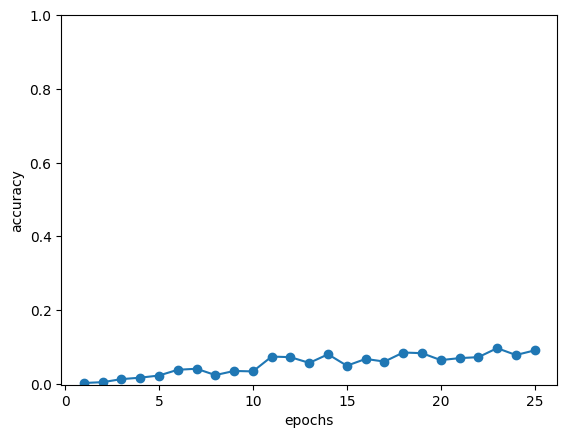

In [ ]:
plt.plot(np.arange(1,max_epoch+1), acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.yticks(np.arange(0.0, 1.2, 0.2))
plt.show()

lstm을 rnn으로 교체

In [14]:
from common.time_layers import *

class EncoderRNN:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, H) / np.sqrt(H)).astype('f')
        lstm_b = (rn(H)).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.rnn = TimeRNN(lstm_Wx, lstm_Wh, lstm_b, stateful=False)

        self.params = self.embed.params + self.rnn.params
        self.grads = self.embed.grads + self.rnn.grads
        self.hs = None
    
    def forward(self, xs):
        xs = self.embed.forward(xs)
        hs = self.rnn.forward(xs)
        self.hs = hs
        return hs[:, -1, :]
    
    def backward(self, dh):
        dhs = np.zeros_like(self.hs)
        dhs[:, -1, :] = dh

        dout = self.rnn.backward(dhs)
        dout = self.embed.backward(dout)
        return dout

Decoder 클래스

In [15]:
class DecoderRNN:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, H) / np.sqrt(H)).astype('f')
        lstm_b = (rn(H)).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.rnn = TimeRNN(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.rnn, self.affine):
            self.params += layer.params
            self.grads += layer.grads
    
    def forward(self, xs, h):
        self.rnn.set_state(h)

        out = self.embed.forward(xs)
        out = self.rnn.forward(out)
        score = self.affine.forward(out)
        return score
    
    def backward(self, dscore):
        dout = self.affine.backward(dscore)
        dout = self.rnn.backward(dout)
        dout = self.embed.backward(dout)
        dh = self.rnn.dh
        return dh
    
    def generate(self, h, start_id, sample_size): ## decoder의 학습과 생성이 다른 이유? 학습은 probabilistic vs 생성은 deterministic
        sampled = []
        sample_id = start_id
        self.rnn.set_state(h)

        for _ in range(sample_size):
            x = np.array(sample_id).reshape((1,1))
            out = self.embed.forward(x)
            out = self.rnn.forward(out)
            score = self.affine.forward(out) 

            ## score -> (1, 1, V)
            sample_id = np.argmax(score.flatten())
            sampled.append(int(sample_id))
        
        return sampled
            

Seq2seq 클래스

In [16]:
from common.base_model import BaseModel

class Seq2seqRNN(BaseModel):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = EncoderRNN(V, D, H)
        self.decoder = DecoderRNN(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads
    
    def forward(self, xs, ts):
        decoder_xs, decoder_ts = ts[:, :-1], ts[:, 1:]
        h = self.encoder.forward(xs)
        score = self.decoder.forward(decoder_xs, h)
        loss = self.softmax.forward(score, decoder_ts)
        return loss
    
    def backward(self, dout=1):
        dout = self.softmax.backward(dout)
        dh = self.decoder.backward(dout)
        dout = self.encoder.backward(dh)
        return dout
    
    def generate(self, xs, start_id, sample_size):
        h = self.encoder.forward(xs)
        sampled = self.decoder.generate(h, start_id, sample_size)
        return sampled

seq2seq 평가

In [17]:
class PeekyDecoderRNN:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(H + D, H) / np.sqrt(H + D)).astype('f')
        lstm_Wh = (rn(H, H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(H).astype('f')
        affine_W = (rn(H + H, V) / np.sqrt(H + H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.rnn = TimeRNN(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.rnn, self.affine):
            self.params += layer.params
            self.grads += layer.grads
        self.cache = None

    def forward(self, xs, h):
        N, T = xs.shape
        N, H = h.shape

        self.rnn.set_state(h)

        out = self.embed.forward(xs)
        hs = np.repeat(h, T, axis=0).reshape(N, T, H)
        out = np.concatenate((hs, out), axis=2)

        out = self.rnn.forward(out)
        out = np.concatenate((hs, out), axis=2)

        score = self.affine.forward(out)
        self.cache = H
        return score

    def backward(self, dscore):
        H = self.cache

        dout = self.affine.backward(dscore)
        dout, dhs0 = dout[:, :, H:], dout[:, :, :H]
        dout = self.rnn.backward(dout)
        dembed, dhs1 = dout[:, :, H:], dout[:, :, :H]
        self.embed.backward(dembed)

        dhs = dhs0 + dhs1
        dh = self.rnn.dh + np.sum(dhs, axis=1)
        return dh

    def generate(self, h, start_id, sample_size):
        sampled = []
        char_id = start_id
        self.rnn.set_state(h)

        H = h.shape[1]
        peeky_h = h.reshape(1, 1, H)
        for _ in range(sample_size):
            x = np.array([char_id]).reshape((1, 1))
            out = self.embed.forward(x)

            out = np.concatenate((peeky_h, out), axis=2)
            out = self.rnn.forward(out)
            out = np.concatenate((peeky_h, out), axis=2)
            score = self.affine.forward(out)

            char_id = np.argmax(score.flatten())
            sampled.append(char_id)

        return sampled


class PeekySeq2seqRNN(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = EncoderRNN(V, D, H)
        self.decoder = PeekyDecoderRNN(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq

(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

model = Seq2seqRNN(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainerRNN = Trainer(model, optimizer)

acc_listRNN = []
for epoch in range(max_epoch):
    trainerRNN.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)

    acc = float(correct_num) / len(x_test)
    acc_listRNN.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.82
| 에폭 1 |  반복 21 / 351 | 시간 0[s] | 손실 2.10
| 에폭 1 |  반복 41 / 351 | 시간 0[s] | 손실 1.94
| 에폭 1 |  반복 61 / 351 | 시간 1[s] | 손실 1.92
| 에폭 1 |  반복 81 / 351 | 시간 1[s] | 손실 1.90
| 에폭 1 |  반복 101 / 351 | 시간 2[s] | 손실 1.85
| 에폭 1 |  반복 121 / 351 | 시간 2[s] | 손실 1.80
| 에폭 1 |  반복 141 / 351 | 시간 3[s] | 손실 1.77
| 에폭 1 |  반복 161 / 351 | 시간 3[s] | 손실 1.75
| 에폭 1 |  반복 181 / 351 | 시간 3[s] | 손실 1.73
| 에폭 1 |  반복 201 / 351 | 시간 4[s] | 손실 1.72
| 에폭 1 |  반복 221 / 351 | 시간 4[s] | 손실 1.72
| 에폭 1 |  반복 241 / 351 | 시간 5[s] | 손실 1.71
| 에폭 1 |  반복 261 / 351 | 시간 5[s] | 손실 1.68
| 에폭 1 |  반복 281 / 351 | 시간 5[s] | 손실 1.66
| 에폭 1 |  반복 301 / 351 | 시간 6[s] | 손실 1.63
| 에폭 1 |  반복 321 / 351 | 시간 6[s] | 손실 1.61
| 에폭 1 |  반복 341 / 351 | 시간 7[s] | 손실 1.58
Q 77+85  
T 162 
☒ 1002
---
Q 975+164
T 1139
☒ 1003
---
Q 582+84 
T 666 
☒ 699 
---
Q 8+155  
T 163 
☒ 104 
---
Q 367+55 
T 422 
☒ 367 
---
Q 600+257
T 857 
☒ 901 
---
Q 761+292
T 1053
☒ 1033
---
Q 830+597
T 1427
☒ 1362
---
Q 26+838

In [23]:
len(x_test)

5000

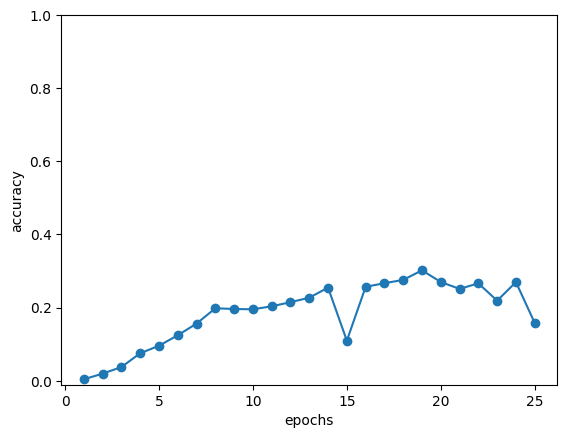

In [21]:
plt.plot(np.arange(1,max_epoch+1), acc_listRNN, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.yticks(np.arange(0.0, 1.2, 0.2))
plt.show()

rnn reverse

In [24]:
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
char_to_id, id_to_char = sequence.get_vocab()

vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

model = Seq2seqRNN(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

reversed_acc_list_RNN = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)

    acc = float(correct_num) / len(x_test)
    reversed_acc_list_RNN.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))


| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.82
| 에폭 1 |  반복 21 / 351 | 시간 0[s] | 손실 2.10
| 에폭 1 |  반복 41 / 351 | 시간 0[s] | 손실 1.94
| 에폭 1 |  반복 61 / 351 | 시간 1[s] | 손실 1.92
| 에폭 1 |  반복 81 / 351 | 시간 1[s] | 손실 1.90
| 에폭 1 |  반복 101 / 351 | 시간 2[s] | 손실 1.86
| 에폭 1 |  반복 121 / 351 | 시간 2[s] | 손실 1.84
| 에폭 1 |  반복 141 / 351 | 시간 3[s] | 손실 1.82
| 에폭 1 |  반복 161 / 351 | 시간 3[s] | 손실 1.78
| 에폭 1 |  반복 181 / 351 | 시간 4[s] | 손실 1.73
| 에폭 1 |  반복 201 / 351 | 시간 4[s] | 손실 1.69
| 에폭 1 |  반복 221 / 351 | 시간 5[s] | 손실 1.67
| 에폭 1 |  반복 241 / 351 | 시간 6[s] | 손실 1.65
| 에폭 1 |  반복 261 / 351 | 시간 6[s] | 손실 1.62
| 에폭 1 |  반복 281 / 351 | 시간 7[s] | 손실 1.59
| 에폭 1 |  반복 301 / 351 | 시간 7[s] | 손실 1.57
| 에폭 1 |  반복 321 / 351 | 시간 8[s] | 손실 1.56
| 에폭 1 |  반복 341 / 351 | 시간 8[s] | 손실 1.53
Q   58+77
T 162 
☒ 100 
---
Q 461+579
T 1139
☒ 1033
---
Q  48+285
T 666 
☒ 631 
---
Q   551+8
T 163 
☒ 111 
---
Q  55+763
T 422 
☒ 431 
---
Q 752+006
T 857 
☒ 731 
---
Q 292+167
T 1053
☒ 1033
---
Q 795+038
T 1427
☒ 1669
---
Q  838+6

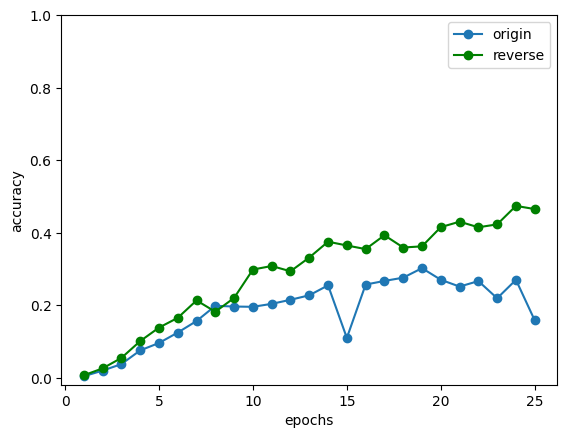

In [28]:
plt.plot(np.arange(1,max_epoch+1), acc_listRNN, marker='o', label='origin')
plt.plot(np.arange(1,max_epoch+1), reversed_acc_list_RNN, marker='o', color='green', label='reverse')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.yticks(np.arange(0.0, 1.2, 0.2))
plt.show()

## seq2seq 개선

입력 데이터 반전(Reverse)

In [43]:
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
char_to_id, id_to_char = sequence.get_vocab()

vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

model = Seq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

reversed_acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)

    acc = float(correct_num) / len(x_test)
    reversed_acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))


| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.60
| 에폭 1 |  반복 21 / 351 | 시간 5[s] | 손실 2.34
| 에폭 1 |  반복 41 / 351 | 시간 7[s] | 손실 2.06
| 에폭 1 |  반복 61 / 351 | 시간 8[s] | 손실 1.94
| 에폭 1 |  반복 81 / 351 | 시간 9[s] | 손실 1.90
| 에폭 1 |  반복 101 / 351 | 시간 10[s] | 손실 1.86
| 에폭 1 |  반복 121 / 351 | 시간 12[s] | 손실 1.85
| 에폭 1 |  반복 141 / 351 | 시간 16[s] | 손실 1.84
| 에폭 1 |  반복 161 / 351 | 시간 18[s] | 손실 1.84
| 에폭 1 |  반복 181 / 351 | 시간 19[s] | 손실 1.84
| 에폭 1 |  반복 201 / 351 | 시간 21[s] | 손실 1.83
| 에폭 1 |  반복 221 / 351 | 시간 22[s] | 손실 1.83
| 에폭 1 |  반복 241 / 351 | 시간 23[s] | 손실 1.81
| 에폭 1 |  반복 261 / 351 | 시간 24[s] | 손실 1.77
| 에폭 1 |  반복 281 / 351 | 시간 25[s] | 손실 1.75
| 에폭 1 |  반복 301 / 351 | 시간 27[s] | 손실 1.73
| 에폭 1 |  반복 321 / 351 | 시간 31[s] | 손실 1.72
| 에폭 1 |  반복 341 / 351 | 시간 32[s] | 손실 1.70
Q   58+77
T 162 
☒ 102 
---
Q 461+579
T 1139
☒ 1022
---
Q  48+285
T 666 
☒ 502 
---
Q   551+8
T 163 
☒ 102 
---
Q  55+763
T 422 
☒ 502 
---
Q 752+006
T 857 
☒ 1002
---
Q 292+167
T 1053
☒ 1022
---
Q 795+038
T 1427
☒ 1024

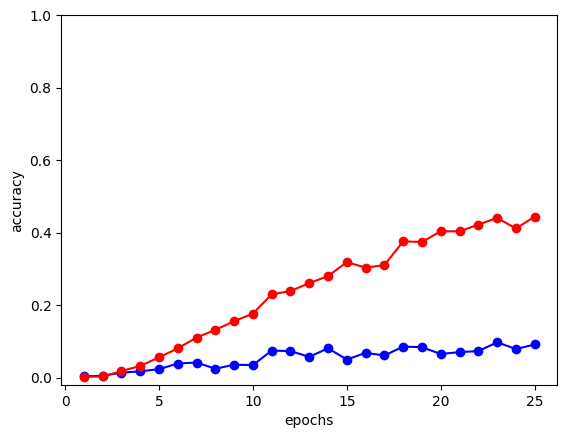

In [44]:
plt.plot(np.arange(1,max_epoch+1), acc_list, marker='o', color='blue')
plt.plot(np.arange(1,max_epoch+1), reversed_acc_list, marker='o', color='red')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.yticks(np.arange(0.0, 1.2, 0.2))
plt.show()

엿보기(Peeky)

In [45]:
class PeekyDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(H+D, 4*H) / np.sqrt(H+D)).astype('f') ## Encoder가 인코딩한 벡터도 입력으로 주어지기 때문에 H 차원 증가
        lstm_Wh = (rn(H, 4*H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4*H).astype('f')
        affine_W = (rn(H+H,V) / np.sqrt(H+H)).astype('f') ## Encoder가 인코딩한 벡터도 입력으로 주어지기 때문에 H 차원 증가
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)
        
        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
        self.cache = None
    
    def forward(self, xs, h):
        N, T = xs.shape
        N, H = h.shape

        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        ## repeat를 수행하면 hs: (N,H) -> (N*T,H)
        hs = np.repeat(h, T, axis=0).reshape(N, T, H)
        out = np.concatenate((hs, out), axis=2) ## -> (N, T, H+D)

        out = self.lstm.forward(out) ## Encoder의 hidden state를 lstm 계층에 전달, (N, T, H)
        out = np.concatenate((hs, out), axis=2) ## -> (N, T, 2*H)

        score = self.affine.forward(out) ## Encoder의 hidden state affine 계층에 전달, (N, T, V)
        self.cache = H
        return score
    
    def backward(self, dscore):
        H = self.cache

        ## Affine 계층 역전파
        dout = self.affine.backward(dscore) ## (N, T, V) -> (N, T, 2*H)
        dout, dhs0 = dout[:, :, H:], dout[:, :, :H] ## LSTM / h -> (N, T, H), forward에서 (hs, out)을 concat 했으므로
        ## LSTM 계층 역전파
        dout = self.lstm.backward(dout) ## (N, T, H) -> (N, T, H+D)
        dembed, dhs1 = dout[:, :, H:], dout[:, :, :H] ## (N, T, D), (N, T, H)
        self.embed.backward(dembed) ## (N, T, D)

        dhs = dhs0 + dhs1 ## (N, T, H)
        ## repeat 노드의 미분은 합으로 계산
        dh = self.lstm.dh + np.sum(dhs, axis=1) ## (N, H) + (N, H)
        return dh ## (N, H)
    
    def generate(self, h, start_id, sample_size):
        sampled = [] 
        char_id = start_id
        self.lstm.set_state(h) ## hidden state 전달 받기

        H = h.shape[1] ## h: (1, H)
        peeky_h = h.reshape(1,1,H)
        for _ in range(sample_size):
            x = np.array([char_id]).reshape((1,1))
            out = self.embed.forward(x)

            out = np.concatenate((peeky_h, out), axis=2) ## hidden state를 LSTM 계층에 추가
            out = self.lstm.forward(out)
            out = np.concatenate((peeky_h, out), axis=2) ## hidden state를 Affine 계층에 추가
            score = self.affine.forward(out)

            char_id = np.argmax(score.flatten()) ## score.flatten -> (H,)
            sampled.append(char_id)

        return sampled

In [46]:
class PeekySeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = PeekyDecoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

In [47]:
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
char_to_id, id_to_char = sequence.get_vocab()

vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

peeky_acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)

    acc = float(correct_num) / len(x_test)
    peeky_acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.61
| 에폭 1 |  반복 21 / 351 | 시간 2[s] | 손실 2.26
| 에폭 1 |  반복 41 / 351 | 시간 6[s] | 손실 1.98
| 에폭 1 |  반복 61 / 351 | 시간 7[s] | 손실 1.93
| 에폭 1 |  반복 81 / 351 | 시간 8[s] | 손실 1.88
| 에폭 1 |  반복 101 / 351 | 시간 10[s] | 손실 1.82
| 에폭 1 |  반복 121 / 351 | 시간 11[s] | 손실 1.80
| 에폭 1 |  반복 141 / 351 | 시간 12[s] | 손실 1.78
| 에폭 1 |  반복 161 / 351 | 시간 14[s] | 손실 1.78
| 에폭 1 |  반복 181 / 351 | 시간 15[s] | 손실 1.77
| 에폭 1 |  반복 201 / 351 | 시간 17[s] | 손실 1.76
| 에폭 1 |  반복 221 / 351 | 시간 18[s] | 손실 1.75
| 에폭 1 |  반복 241 / 351 | 시간 19[s] | 손실 1.75
| 에폭 1 |  반복 261 / 351 | 시간 20[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 22[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 24[s] | 손실 1.72
| 에폭 1 |  반복 321 / 351 | 시간 25[s] | 손실 1.72
| 에폭 1 |  반복 341 / 351 | 시간 26[s] | 손실 1.71
Q   58+77
T 162 
☒ 107 
---
Q 461+579
T 1139
☒ 1111
---
Q  48+285
T 666 
☒ 105 
---
Q   551+8
T 163 
☒ 101 
---
Q  55+763
T 422 
☒ 105 
---
Q 752+006
T 857 
☒ 1011
---
Q 292+167
T 1053
☒ 1011
---
Q 795+038
T 1427
☒ 1111

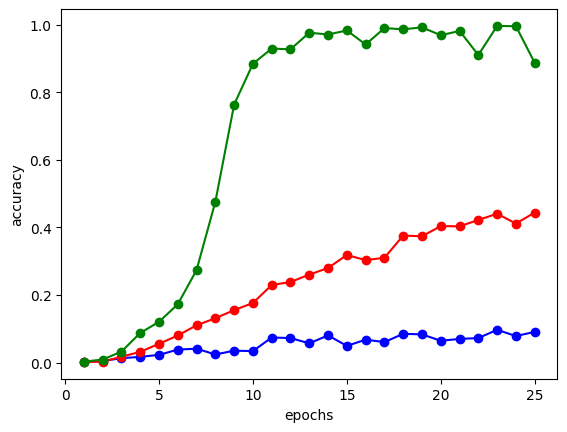

In [48]:
plt.plot(np.arange(1,max_epoch+1), acc_list, marker='o', color='blue')
plt.plot(np.arange(1,max_epoch+1), reversed_acc_list, marker='o', color='red')
plt.plot(np.arange(1,max_epoch+1), peeky_acc_list, marker='o', color='green')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.yticks(np.arange(0.0, 1.2, 0.2))
plt.show()